In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile

In [5]:
#specifying the zip file name
file_name = "archive.zip"
#opening the zip file in read mode
with zipfile.ZipFile(file_name,'r') as zip:
    print("extracting all files")
    zip.extractall()
    print("done")

extracting all files
done


In [2]:
#training data preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 3115 files belonging to 36 classes.


In [3]:
#validation data preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 351 files belonging to 36 classes.


In [4]:
#building maodel
cnn = tf.keras.models.Sequential()

In [5]:
#here we are decreasing the size of the matrix so that we can use those features which are important for our model
cnn.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 3,activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides = 2))

In [6]:
#to avoid overfitting we are passing these arguments
cnn.add(tf.keras.layers.Dropout(0.5))

In [7]:
#here we are flattenning our matrix
cnn.add(tf.keras.layers.Flatten())

In [8]:
#making the neurons
cnn.add(tf.keras.layers.Dense(units = 128,activation =  'relu'))

In [9]:
#collect output layer
cnn.add(tf.keras.layers.Dense(units = 36,activation = 'softmax'))

In [14]:
#compilling phase
cnn.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [15]:
#trainning phase
training_history = cnn.fit(x = training_set,validation_data  = validation_set,epochs = 30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - accuracy: 0.0289 - loss: 582.5944 - val_accuracy: 0.0342 - val_loss: 3.5771
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - accuracy: 0.0287 - loss: 3.7160 - val_accuracy: 0.0342 - val_loss: 3.5685
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.0345 - loss: 3.6642 - val_accuracy: 0.0285 - val_loss: 3.5837
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 161ms/step - accuracy: 0.0331 - loss: 3.6512 - val_accuracy: 0.0256 - val_loss: 3.5839
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 158ms/step - accuracy: 0.0339 - loss: 3.5827 - val_accuracy: 0.0256 - val_loss: 3.5841
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.0355 - loss: 6.0714 - val_accuracy: 0.0256 - val_loss: 3.5843
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.0333 - loss: 3.5770 - val_accuracy: 0.0256 - val_loss: 3.5846
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - accuracy: 0.0368 - loss: 3.5747 - val_ac

In [16]:
#saving the model in h5 file
cnn.save('raw_model.h5')

In [17]:
#saving the model in keras file
cnn.save('raw_model.keras')

In [18]:
#creating the history of the model
training_history.history

{'accuracy': [0.031139647588133812,
  0.02921348251402378,
  0.031139647588133812,
  0.028250401839613914,
  0.03210273012518883,
  0.033707864582538605,
  0.03242375701665878,
  0.03242375701665878,
  0.03242375701665878,
  0.03242375701665878,
  0.03242375701665878,
  0.03242375701665878,
  0.03242375701665878,
  0.02921348251402378,
  0.02921348251402378,
  0.030176565051078796,
  0.02921348251402378,
  0.027608346194028854,
  0.026966292411088943,
  0.030497591942548752,
  0.028892455622553825,
  0.02985553815960884,
  0.028250401839613914,
  0.027608346194028854,
  0.026003209874033928,
  0.02792937308549881,
  0.02792937308549881,
  0.030818618834018707,
  0.03210273012518883,
  0.03178170323371887],
 'loss': [176.98406982421875,
  3.913829803466797,
  3.6250319480895996,
  3.634467124938965,
  3.5836896896362305,
  4.881145477294922,
  3.5791730880737305,
  3.5788488388061523,
  3.5786139965057373,
  3.578359842300415,
  3.5781867504119873,
  3.5780351161956787,
  3.577907323837

In [19]:
#recordinng the history of the model
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [20]:
#calculating the accuracy of the the model achieved on validation
print("validation set Accuracy : {} %".format(training_history.history['val_accuracy'][-1]*100))

validation set Accuracy : 2.5641025975346565 %


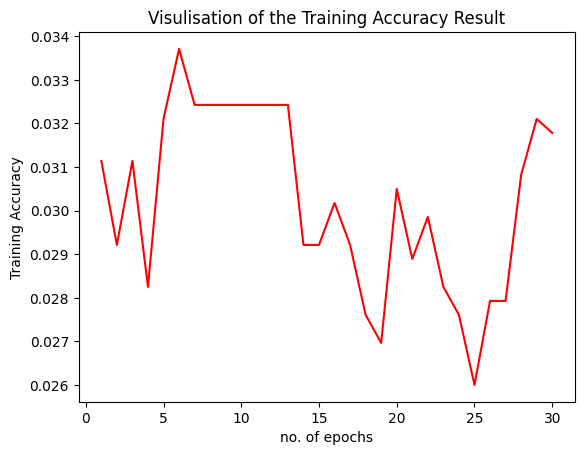

In [21]:
#visulation of the training accuracy
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color = 'red')
plt.xlabel('no. of epochs')
plt.ylabel('Training Accuracy')
plt.title('Visulisation of the Training Accuracy Result')
plt.show()

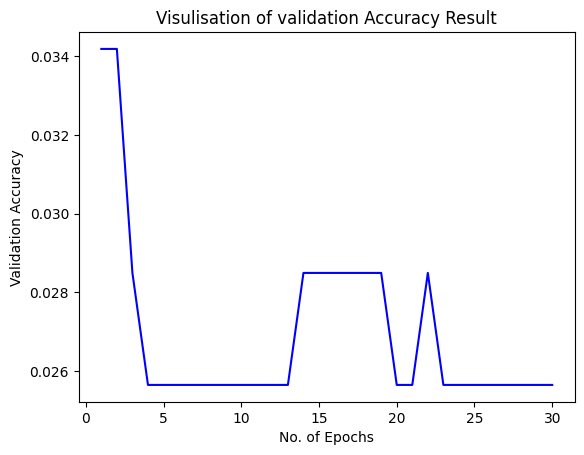

In [22]:
#visulisation of validation accuracy
plt.plot(epochs,training_history.history['val_accuracy'],color = 'blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visulisation of validation Accuracy Result')
plt.show()